## 1. 필요 라이브러리 및 데이터

In [2]:
import pandas as pd

In [3]:
df = pd.read_stata('./lendingclub_train.dta')

# 유용한 메소드 2개 완성, 두 데이터프레임 합치기 / 데이터 프레임에서 원하는 열 삭제하기

In [4]:
def concatTwoDataFrames(df1,df2):
    namesOf2 = df2.columns.tolist()
    for name in namesOf2:
        df1[name] = df2[name]
    return df1

In [5]:
def deleteColumnsFromDataFrame(df, L):
    if type(L) == list:
        newDf = df.drop(columns=[]+L)
    elif type(L) == str:
        newDf = df.drop(columns=[L])
    return newDf

# 이상하거나 필요없는 데이터 미리 제거

In [6]:
# 연간소득 이상자 제거
df.drop([831698], axis=0, inplace=True)

# 전체 데이터를 X_initial, X_lc, X_inv, X_post, X_final, y로 나누기

In [7]:
names_initial = ['loan_amnt',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'fico_range_high',
 'fico_range_low',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'collections_12_mths_ex_med',
 'inq_last_6mths',
 'pub_rec_bankruptcies',
 'tax_liens',
 'term1',
 'emp_length1',
 'emp_length2',
 'emp_length3',
 'emp_length4',
 'emp_length5',
 'emp_length6',
 'emp_length7',
 'emp_length8',
 'emp_length9',
 'emp_length10',
 'emp_length11',
 'emp_length12',
 'home_ownership1',
 'home_ownership2',
 'home_ownership3',
 'home_ownership4',
 'home_ownership5',
 'home_ownership6',
 'purpose1',
 'purpose2',
 'purpose3',
 'purpose4',
 'purpose5',
 'purpose6',
 'purpose7',
 'purpose8',
 'purpose9',
 'purpose10',
 'purpose11',
 'purpose12',
 'purpose13',
 'purpose14',
 'addr_state1',
 'addr_state2',
 'addr_state3',
 'addr_state4',
 'addr_state5',
 'addr_state6',
 'addr_state7',
 'addr_state8',
 'addr_state9',
 'addr_state10',
 'addr_state11',
 'addr_state12',
 'addr_state13',
 'addr_state14',
 'addr_state15',
 'addr_state16',
 'addr_state17',
 'addr_state18',
 'addr_state19',
 'addr_state20',
 'addr_state21',
 'addr_state22',
 'addr_state23',
 'addr_state24',
 'addr_state25',
 'addr_state26',
 'addr_state27',
 'addr_state28',
 'addr_state29',
 'addr_state30',
 'addr_state31',
 'addr_state32',
 'addr_state33',
 'addr_state34',
 'addr_state35',
 'addr_state36',
 'addr_state37',
 'addr_state38',
 'addr_state39',
 'addr_state40',
 'addr_state41',
 'addr_state42',
 'addr_state43',
 'addr_state44',
 'addr_state45',
 'addr_state46',
 'addr_state47',
 'addr_state48',
 'addr_state49',
 'addr_state50',
 'addr_state51',
 'mths_since_last_delinq1',
 'mths_since_last_delinq2',
 'mths_since_last_delinq3',
 'mths_since_last_delinq4',
 'mths_since_last_delinq5',
 'mths_since_last_delinq6',
 'mths_since_last_delinq7',
 'mths_since_last_delinq8',
 'mths_since_last_delinq9',
 'mths_since_last_delinq10',
 'mths_since_last_delinq11',
 'mths_since_last_major_derog1',
 'mths_since_last_major_derog2',
 'mths_since_last_major_derog3',
 'mths_since_last_major_derog4',
 'mths_since_last_major_derog5',
 'mths_since_last_major_derog6',
 'mths_since_last_major_derog7',
 'mths_since_last_major_derog8',
 'mths_since_last_major_derog9',
 'mths_since_last_major_derog10',
 'mths_since_last_major_derog11',
 'mths_since_last_record1',
 'mths_since_last_record2',
 'mths_since_last_record3',
 'mths_since_last_record4',
 'mths_since_last_record5',
 'mths_since_last_record6',
 'mths_since_last_record7',
 'mths_since_last_record8',
 'mths_since_last_record9',
 'mths_since_last_record10',
 'mths_since_last_record11',
 'mths_since_rcnt_il1',
 'mths_since_rcnt_il2',
 'mths_since_rcnt_il3',
 'mths_since_rcnt_il4',
 'mths_since_rcnt_il5',
 'mths_since_rcnt_il6',
 'mths_since_rcnt_il7',
 'mths_since_rcnt_il8',
 'mths_since_rcnt_il9',
 'mths_since_rcnt_il10',
 'mths_since_rcnt_il11',
 'mths_since_recent_bc1',
 'mths_since_recent_bc2',
 'mths_since_recent_bc3',
 'mths_since_recent_bc4',
 'mths_since_recent_bc5',
 'mths_since_recent_bc6',
 'mths_since_recent_bc7',
 'mths_since_recent_bc8',
 'mths_since_recent_bc9',
 'mths_since_recent_bc10',
 'mths_since_recent_bc11',
 'mths_since_recent_bc_dlq1',
 'mths_since_recent_bc_dlq2',
 'mths_since_recent_bc_dlq3',
 'mths_since_recent_bc_dlq4',
 'mths_since_recent_bc_dlq5',
 'mths_since_recent_bc_dlq6',
 'mths_since_recent_bc_dlq7',
 'mths_since_recent_bc_dlq8',
 'mths_since_recent_bc_dlq9',
 'mths_since_recent_bc_dlq10',
 'mths_since_recent_bc_dlq11',
 'mths_since_recent_inq1',
 'mths_since_recent_inq2',
 'mths_since_recent_inq3',
 'mths_since_recent_inq4',
 'mths_since_recent_inq5',
 'mths_since_recent_inq6',
 'mths_since_recent_inq7',
 'mths_since_recent_inq8',
 'mths_since_recent_inq9',
 'mths_since_recent_inq10',
 'mths_since_recent_revol_delinq1',
 'mths_since_recent_revol_delinq2',
 'mths_since_recent_revol_delinq3',
 'mths_since_recent_revol_delinq4',
 'mths_since_recent_revol_delinq5',
 'mths_since_recent_revol_delinq6',
 'mths_since_recent_revol_delinq7',
 'mths_since_recent_revol_delinq8',
 'mths_since_recent_revol_delinq9',
 'mths_since_recent_revol_delinq10',
 'mths_since_recent_revol_delinq11']

In [8]:
X_initial = df[names_initial]
X_initial

,loan_amnt,annual_inc,dti,delinq_2yrs,fico_range_high,fico_range_low,open_acc,pub_rec,revol_bal,revol_util,...,mths_since_recent_revol_delinq2,mths_since_recent_revol_delinq3,mths_since_recent_revol_delinq4,mths_since_recent_revol_delinq5,mths_since_recent_revol_delinq6,mths_since_recent_revol_delinq7,mths_since_recent_revol_delinq8,mths_since_recent_revol_delinq9,mths_since_recent_revol_delinq10,mths_since_recent_revol_delinq11
0,12000,90641.0,10.20,0,694,690,5,0,5673,0.405,...,0,0,0,0,0,0,0,0,0,0
1,14000,46000.0,17.40,1,674,670,9,0,10285,0.664,...,0,0,0,1,0,0,0,0,0,0
2,24000,90000.0,11.73,2,664,660,6,0,18989,0.474,...,0,0,0,0,0,0,0,0,0,0
3,14000,115000.0,7.31,0,664,660,16,0,16451,0.401,...,0,0,0,0,0,0,0,0,0,0
4,14000,78000.0,24.32,0,689,685,17,0,25930,0.534,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874330,32000,90000.0,27.39,0,739,735,14,0,91190,0.813,...,0,0,0,0,0,0,0,0,0,0
874331,24000,76000.0,34.20,0,689,685,16,0,38338,0.844,...,0,0,0,0,0,0,0,0,0,0
874332,4000,24960.0,25.29,0,794,790,15,0,3397,0.092,...,0,0,0,0,0,0,0,0,0,0
874333,8000,53000.0,18.07,2,684,680,10,1,3304,0.370,...,0,0,0,1,0,0,0,0,0,0


In [9]:
names_lc = ['funded_amnt',
 'int_rate',
 'installment',
 'verification_status1',
 'verification_status2',
 'verification_status3',
 'initial_list_status1',
 'initial_list_status2']

In [10]:
X_lc = df[names_lc]
X_lc

,funded_amnt,int_rate,installment,verification_status1,verification_status2,verification_status3,initial_list_status1,initial_list_status2
0,12000,0.0789,375.43,1,0,0,0,1
1,14000,0.1147,461.47,1,0,0,0,1
2,24000,0.1147,791.09,0,1,0,0,1
3,14000,0.0949,448.40,0,1,0,0,1
4,14000,0.0999,451.68,0,1,0,0,1
...,...,...,...,...,...,...,...,...
874330,32000,0.1875,825.71,0,0,1,0,1
874331,24000,0.0692,740.18,0,0,1,0,1
874332,4000,0.0662,122.82,1,0,0,1,0
874333,8000,0.1288,269.09,0,1,0,0,1


In [11]:
names_inv = ['funded_amnt_inv']

In [12]:
X_inv = df[names_inv + ['depvar']]
X_inv

,funded_amnt_inv,depvar
0,12000.0,1.0
1,14000.0,0.0
2,24000.0,0.0
3,14000.0,0.0
4,14000.0,0.0
...,...,...
874330,32000.0,0.0
874331,24000.0,0.0
874332,4000.0,0.0
874333,8000.0,0.0


In [13]:
names_post = ['out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'last_fico_range_high',
 'last_fico_range_low',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'debt_settlement_flag1',
 'issue_d1',
 'issue_d2',
 'issue_d3',
 'issue_d4',
 'issue_d5',
 'issue_d6',
 'issue_d7',
 'issue_d8',
 'issue_d9',
 'issue_d10',
 'issue_d11',
 'issue_d12',
 'issue_d13',
 'issue_d14',
 'issue_d15',
 'issue_d16',
 'issue_d17',
 'issue_d18',
 'issue_d19',
 'issue_d20',
 'issue_d21',
 'issue_d22',
 'issue_d23',
 'issue_d24',
 'issue_d25',
 'issue_d26',
 'issue_d27',
 'issue_d28',
 'issue_d29',
 'issue_d30',
 'issue_d31',
 'issue_d32',
 'issue_d33',
 'issue_d34',
 'issue_d35',
 'issue_d36',
 'issue_d37',
 'issue_d38',
 'issue_d39',
 'issue_d40',
 'issue_d41',
 'issue_d42',
 'issue_d43',
 'issue_d44',
 'issue_d45',
 'issue_d46',
 'issue_d47',
 'issue_d48',
 'issue_d49',
 'issue_d50',
 'issue_d51',
 'issue_d52',
 'issue_d53',
 'issue_d54',
 'issue_d55',
 'issue_d56',
 'issue_d57',
 'issue_d58',
 'issue_d59',
 'issue_d60',
 'issue_d61',
 'issue_d62',
 'issue_d63',
 'issue_d64',
 'issue_d65',
 'issue_d66',
 'issue_d67',
 'issue_d68',
 'issue_d69',
 'issue_d70',
 'issue_d71',
 'issue_d72',
 'issue_d73',
 'issue_d74',
 'issue_d75',
 'issue_d76',
 'issue_d77',
 'issue_d78',
 'issue_d79',
 'issue_d80',
 'issue_d81',
 'issue_d82',
 'issue_d83',
 'issue_d84',
 'issue_d85',
 'issue_d86',
 'issue_d87',
 'issue_d88',
 'issue_d89',
 'issue_d90',
 'issue_d91',
 'issue_d92',
 'issue_d93',
 'issue_d94',
 'issue_d95',
 'issue_d96',
 'issue_d97',
 'issue_d98',
 'issue_d99',
 'issue_d100',
 'issue_d101',
 'issue_d102',
 'issue_d103',
 'issue_d104',
 'issue_d105',
 'issue_d106',
 'issue_d107',
 'issue_d108',
 'issue_d109',
 'issue_d110',
 'issue_d111',
 'issue_d112',
 'issue_d113',
 'issue_d114',
 'issue_d115',
 'issue_d116',
 'issue_d117',
 'issue_d118']

In [14]:
names_post

['out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'last_fico_range_high',
 'last_fico_range_low',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'debt_settlement_flag1',
 'issue_d1',
 'issue_d2',
 'issue_d3',
 'issue_d4',
 'issue_d5',
 'issue_d6',
 'issue_d7',
 'issue_d8',
 'issue_d9',
 'issue_d10',
 'issue_d11',
 'issue_d12',
 'issue_d13',
 'issue_d14',
 'issue_d15',
 'issue_d16',
 'issue_d17',
 'issue_d18',
 'issue_d19',
 'issue_d20',
 'issue_d21',
 'issue_d22',
 'issue_d23',
 'issue_d24',
 'issue_d25',
 'issue_d26',
 'issue_d27',
 'issue_d28',
 'issue_d29',
 'issue_d30',
 'issue_d31',
 'issue_d32',
 'issue_d33',
 'issue_d34',
 'issue_d35',
 'issue_d36',
 'issue_d37',
 'issue_d38',
 'issue_d39',
 'issue_d40',
 'issue_d41',
 'issue_d42',
 'issue_d43',
 'issue_d44',
 'issue_d45',
 'issue_d46',
 

In [15]:
X_post = df[names_post]
X_post

,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,...,issue_d109,issue_d110,issue_d111,issue_d112,issue_d113,issue_d114,issue_d115,issue_d116,issue_d117,issue_d118
0,0.0,0.0,9735.810000,9735.81,5646.56,1127.76,0.0,2961.49,533.0682,375.43,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,16376.889160,16376.89,14000.00,2376.89,0.0,0.00,0.0000,4849.06,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0.0,28435.239310,28435.24,24000.00,4435.24,0.0,0.00,0.0000,14.56,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0.0,16034.225380,16034.23,14000.00,2034.23,0.0,0.00,0.0000,0.91,...,0,0,0,1,0,0,0,0,0,0
4,0.0,0.0,14954.260000,14954.26,14000.00,954.26,0.0,0.00,0.0000,11769.19,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874330,0.0,0.0,40999.670000,40999.67,32000.00,8999.67,0.0,0.00,0.0000,25311.18,...,0,0,0,0,0,0,0,0,0,0
874331,0.0,0.0,26627.742300,26627.74,24000.00,2627.74,0.0,0.00,0.0000,739.89,...,0,0,0,0,0,0,0,0,0,0
874332,0.0,0.0,4361.030000,4361.03,4000.00,361.03,0.0,0.00,0.0000,1781.81,...,0,0,0,0,0,0,0,0,0,0
874333,0.0,0.0,8942.840225,8942.84,8000.00,942.84,0.0,0.00,0.0000,5988.57,...,0,0,0,0,0,0,0,0,0,0


In [16]:
names_excluded = ['index', 'elapsed_t']

In [17]:
X_excluded = df[names_excluded]
X_excluded

,index,elapsed_t
0,1027571,61.0
1,46603,50.0
2,40908,49.0
3,182450,43.0
4,868323,54.0
...,...,...
874330,480114,83.0
874331,1027649,61.0
874332,773937,75.0
874333,87618,51.0


In [18]:
names_y = ['depvar']

In [19]:
y = df[names_y]
y

,depvar
0,1.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
874330,0.0
874331,0.0
874332,0.0
874333,0.0


# X_initial 을 X_initial_ordinal, X_initial_nominal로 나누기

In [20]:
names_initial_ordinal = names_initial[0:15]
names_initial_ordinal

['loan_amnt',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'fico_range_high',
 'fico_range_low',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'collections_12_mths_ex_med',
 'inq_last_6mths',
 'pub_rec_bankruptcies',
 'tax_liens']

In [21]:
names_initial_nominal = names_initial[15:]
names_initial_nominal

['term1',
 'emp_length1',
 'emp_length2',
 'emp_length3',
 'emp_length4',
 'emp_length5',
 'emp_length6',
 'emp_length7',
 'emp_length8',
 'emp_length9',
 'emp_length10',
 'emp_length11',
 'emp_length12',
 'home_ownership1',
 'home_ownership2',
 'home_ownership3',
 'home_ownership4',
 'home_ownership5',
 'home_ownership6',
 'purpose1',
 'purpose2',
 'purpose3',
 'purpose4',
 'purpose5',
 'purpose6',
 'purpose7',
 'purpose8',
 'purpose9',
 'purpose10',
 'purpose11',
 'purpose12',
 'purpose13',
 'purpose14',
 'addr_state1',
 'addr_state2',
 'addr_state3',
 'addr_state4',
 'addr_state5',
 'addr_state6',
 'addr_state7',
 'addr_state8',
 'addr_state9',
 'addr_state10',
 'addr_state11',
 'addr_state12',
 'addr_state13',
 'addr_state14',
 'addr_state15',
 'addr_state16',
 'addr_state17',
 'addr_state18',
 'addr_state19',
 'addr_state20',
 'addr_state21',
 'addr_state22',
 'addr_state23',
 'addr_state24',
 'addr_state25',
 'addr_state26',
 'addr_state27',
 'addr_state28',
 'addr_state29',
 'ad

In [22]:
X_initial_ordinal = df[names_initial_ordinal]
X_initial_ordinal

,loan_amnt,annual_inc,dti,delinq_2yrs,fico_range_high,fico_range_low,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,inq_last_6mths,pub_rec_bankruptcies,tax_liens
0,12000,90641.0,10.20,0,694,690,5,0,5673,0.405,20,0,1,0,0
1,14000,46000.0,17.40,1,674,670,9,0,10285,0.664,18,0,0,0,0
2,24000,90000.0,11.73,2,664,660,6,0,18989,0.474,10,0,0,0,0
3,14000,115000.0,7.31,0,664,660,16,0,16451,0.401,22,0,1,0,0
4,14000,78000.0,24.32,0,689,685,17,0,25930,0.534,30,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874330,32000,90000.0,27.39,0,739,735,14,0,91190,0.813,17,0,0,0,0
874331,24000,76000.0,34.20,0,689,685,16,0,38338,0.844,24,0,0,0,0
874332,4000,24960.0,25.29,0,794,790,15,0,3397,0.092,26,0,2,0,0
874333,8000,53000.0,18.07,2,684,680,10,1,3304,0.370,24,0,1,1,0


In [23]:
X_initial_nominal = df[names_initial_nominal]
X_initial_nominal

,term1,emp_length1,emp_length2,emp_length3,emp_length4,emp_length5,emp_length6,emp_length7,emp_length8,emp_length9,...,mths_since_recent_revol_delinq2,mths_since_recent_revol_delinq3,mths_since_recent_revol_delinq4,mths_since_recent_revol_delinq5,mths_since_recent_revol_delinq6,mths_since_recent_revol_delinq7,mths_since_recent_revol_delinq8,mths_since_recent_revol_delinq9,mths_since_recent_revol_delinq10,mths_since_recent_revol_delinq11
0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874330,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
874331,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
874332,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
874333,1,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


# X_initial_ordinal (수치 변수) 정규화하기

### Scikit-learn 이용한 정규화 (DataFrame이 아니므로 변수의 명칭 사라짐)

In [24]:
# min-max scaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_initial_ordinal)
scaler.transform(X_initial_ordinal)

array([[0.28205128, 0.00915782, 0.20416333, ..., 0.125     , 0.        ,
        0.        ],
       [0.33333333, 0.00449317, 0.34827862, ..., 0.        , 0.        ,
        0.        ],
       [0.58974359, 0.00909084, 0.23478783, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.07692308, 0.00229465, 0.50620496, ..., 0.25      , 0.        ,
        0.        ],
       [0.17948718, 0.00522462, 0.36168935, ..., 0.125     , 0.08333333,
        0.        ],
       [0.17948718, 0.00773244, 0.36068855, ..., 0.        , 0.        ,
        0.        ]])

In [25]:
# standard scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_initial_ordinal)
scaler.transform(X_initial_ordinal)

array([[-0.19481557,  0.21788862, -0.95921056, ...,  0.38505447,
        -0.34912346, -0.13977713],
       [ 0.04210369, -0.42869788, -0.09351622, ..., -0.68550803,
        -0.34912346, -0.13977713],
       [ 1.22669997,  0.20860429, -0.77525051, ..., -0.68550803,
        -0.34912346, -0.13977713],
       ...,
       [-1.14249259, -0.73344418,  0.8551405 , ...,  1.45561697,
        -0.34912346, -0.13977713],
       [-0.66865408, -0.3273089 , -0.01295855, ...,  0.38505447,
         2.27580676, -0.13977713],
       [-0.66865408,  0.02031047, -0.01897032, ..., -0.68550803,
        -0.34912346, -0.13977713]])

### 직접 데이터를 정규화 (DataFrame이 아니므로 변수의 명칭 사라짐)

In [26]:
normed_X_initial_ordinal = pd.DataFrame()
for name in X_initial_ordinal.columns.tolist():
    mm = max(X_initial_ordinal[name])
    m = min(X_initial_ordinal[name])
    normed_X_initial_ordinal[name] = (X_initial_ordinal[name] - m)/(mm-m)

In [27]:
# 이렇게 할 경우 데이터프레임 형식을 유지하므로 EDA나 모델링활용에 더 용이하다.
normed_X_initial_ordinal

,loan_amnt,annual_inc,dti,delinq_2yrs,fico_range_high,fico_range_low,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,inq_last_6mths,pub_rec_bankruptcies,tax_liens
0,0.282051,0.009158,0.204163,0.000000,0.161290,0.162162,0.044944,0.000000,0.002208,0.045388,0.103448,0.0,0.125,0.000000,0.0
1,0.333333,0.004493,0.348279,0.033333,0.053763,0.054054,0.089888,0.000000,0.004004,0.074414,0.091954,0.0,0.000,0.000000,0.0
2,0.589744,0.009091,0.234788,0.066667,0.000000,0.000000,0.056180,0.000000,0.007392,0.053121,0.045977,0.0,0.000,0.000000,0.0
3,0.333333,0.011703,0.146317,0.000000,0.000000,0.000000,0.168539,0.000000,0.006404,0.044940,0.114943,0.0,0.125,0.000000,0.0
4,0.333333,0.007837,0.486789,0.000000,0.134409,0.135135,0.179775,0.000000,0.010093,0.059845,0.160920,0.0,0.250,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874330,0.794872,0.009091,0.548239,0.000000,0.403226,0.405405,0.146067,0.000000,0.035496,0.091113,0.086207,0.0,0.000,0.000000,0.0
874331,0.589744,0.007628,0.684548,0.000000,0.134409,0.135135,0.168539,0.000000,0.014923,0.094587,0.126437,0.0,0.000,0.000000,0.0
874332,0.076923,0.002295,0.506205,0.000000,0.698925,0.702703,0.157303,0.000000,0.001322,0.010310,0.137931,0.0,0.250,0.000000,0.0
874333,0.179487,0.005225,0.361689,0.066667,0.107527,0.108108,0.101124,0.011628,0.001286,0.041466,0.126437,0.0,0.125,0.083333,0.0


In [28]:
# (!!!) 연간소득의 경우 기형적인 아웃라이어 데이터가 있으므로, 모든 자료에서 해당 데이터를 삭제해야할 것 같다?
# 그 사람의 인덱스는 831698 임. 아래는 그 사람의 데이터. annual_inc를 보라.
# df.loc[[831698]]

# digitized_X_initial_ordinal : X_initial_ordinal 중 이진화할 필요가 있는 변수 이진화

In [29]:
# 이진 분류해야 할 변수들
# delinq_2yrs
# pub_rec
# revol_bal
# collections_12_mths_ex_med
# pub_rec_bankruptcies
# tax_liens

In [30]:
X_initial.copy()['delinq_2yrs']

0         0
1         1
2         2
3         0
4         0
         ..
874330    0
874331    0
874332    0
874333    2
874334    1
Name: delinq_2yrs, Length: 874334, dtype: int8

In [31]:
names_undigitized = [
 'loan_amnt',
 'annual_inc',
 'dti',
 'fico_range_high',
 'fico_range_low',
 'open_acc',
 'revol_util',
 'total_acc',
 'inq_last_6mths',
]

In [32]:
digitized_X_initial_ordinal = X_initial.copy()[names_undigitized]
digitized_X_initial_ordinal

,loan_amnt,annual_inc,dti,fico_range_high,fico_range_low,open_acc,revol_util,total_acc,inq_last_6mths
0,12000,90641.0,10.20,694,690,5,0.405,20,1
1,14000,46000.0,17.40,674,670,9,0.664,18,0
2,24000,90000.0,11.73,664,660,6,0.474,10,0
3,14000,115000.0,7.31,664,660,16,0.401,22,1
4,14000,78000.0,24.32,689,685,17,0.534,30,2
...,...,...,...,...,...,...,...,...,...
874330,32000,90000.0,27.39,739,735,14,0.813,17,0
874331,24000,76000.0,34.20,689,685,16,0.844,24,0
874332,4000,24960.0,25.29,794,790,15,0.092,26,2
874333,8000,53000.0,18.07,684,680,10,0.370,24,1


In [33]:
def digitizeVariable(str):
    bucket = []
    for data in X_initial.copy()[str]:
        if data != 0:
            bucket.append(1)
        else:
            bucket.append(0)
    digitized_X_initial_ordinal['digitized_'+str] = bucket

In [34]:
for name in ['delinq_2yrs', 'pub_rec', 'revol_bal', 'collections_12_mths_ex_med', 'pub_rec_bankruptcies', 'tax_liens']:
    digitizeVariable(name)

In [35]:
listWannabe = ['delinq_2yrs', 'pub_rec', 'revol_bal', 'collections_12_mths_ex_med', 'pub_rec_bankruptcies', 'tax_liens']

In [36]:
digitized_X_initial_ordinal

,loan_amnt,annual_inc,dti,fico_range_high,fico_range_low,open_acc,revol_util,total_acc,inq_last_6mths,digitized_delinq_2yrs,digitized_pub_rec,digitized_revol_bal,digitized_collections_12_mths_ex_med,digitized_pub_rec_bankruptcies,digitized_tax_liens
0,12000,90641.0,10.20,694,690,5,0.405,20,1,0,0,1,0,0,0
1,14000,46000.0,17.40,674,670,9,0.664,18,0,1,0,1,0,0,0
2,24000,90000.0,11.73,664,660,6,0.474,10,0,1,0,1,0,0,0
3,14000,115000.0,7.31,664,660,16,0.401,22,1,0,0,1,0,0,0
4,14000,78000.0,24.32,689,685,17,0.534,30,2,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874330,32000,90000.0,27.39,739,735,14,0.813,17,0,0,0,1,0,0,0
874331,24000,76000.0,34.20,689,685,16,0.844,24,0,0,0,1,0,0,0
874332,4000,24960.0,25.29,794,790,15,0.092,26,2,0,0,1,0,0,0
874333,8000,53000.0,18.07,684,680,10,0.370,24,1,1,1,1,0,1,0


In [37]:
X_excluded

,index,elapsed_t
0,1027571,61.0
1,46603,50.0
2,40908,49.0
3,182450,43.0
4,868323,54.0
...,...,...
874330,480114,83.0
874331,1027649,61.0
874332,773937,75.0
874333,87618,51.0


In [38]:
df[['fico_range_high']]

,fico_range_high
0,694
1,674
2,664
3,664
4,689
...,...
874330,739
874331,689
874332,794
874333,684


In [39]:
# 대신 'fico_range_high' 는 X_excluded로 이동
X_excluded = concatTwoDataFrames(X_excluded, df[['fico_range_high']])
X_excluded

/var/folders/89/q65htr7s3zx_vygvg7q4nd3h0000gn/T/ipykernel_85725/3710137047.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[name] = df2[name]


,index,elapsed_t,fico_range_high
0,1027571,61.0,694
1,46603,50.0,674
2,40908,49.0,664
3,182450,43.0,664
4,868323,54.0,689
...,...,...,...
874330,480114,83.0,739
874331,1027649,61.0,689
874332,773937,75.0,794
874333,87618,51.0,684


In [40]:
X_initial

,loan_amnt,annual_inc,dti,delinq_2yrs,fico_range_high,fico_range_low,open_acc,pub_rec,revol_bal,revol_util,...,mths_since_recent_revol_delinq2,mths_since_recent_revol_delinq3,mths_since_recent_revol_delinq4,mths_since_recent_revol_delinq5,mths_since_recent_revol_delinq6,mths_since_recent_revol_delinq7,mths_since_recent_revol_delinq8,mths_since_recent_revol_delinq9,mths_since_recent_revol_delinq10,mths_since_recent_revol_delinq11
0,12000,90641.0,10.20,0,694,690,5,0,5673,0.405,...,0,0,0,0,0,0,0,0,0,0
1,14000,46000.0,17.40,1,674,670,9,0,10285,0.664,...,0,0,0,1,0,0,0,0,0,0
2,24000,90000.0,11.73,2,664,660,6,0,18989,0.474,...,0,0,0,0,0,0,0,0,0,0
3,14000,115000.0,7.31,0,664,660,16,0,16451,0.401,...,0,0,0,0,0,0,0,0,0,0
4,14000,78000.0,24.32,0,689,685,17,0,25930,0.534,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874330,32000,90000.0,27.39,0,739,735,14,0,91190,0.813,...,0,0,0,0,0,0,0,0,0,0
874331,24000,76000.0,34.20,0,689,685,16,0,38338,0.844,...,0,0,0,0,0,0,0,0,0,0
874332,4000,24960.0,25.29,0,794,790,15,0,3397,0.092,...,0,0,0,0,0,0,0,0,0,0
874333,8000,53000.0,18.07,2,684,680,10,1,3304,0.370,...,0,0,0,1,0,0,0,0,0,0


In [41]:
digitized_X_initial_ordinal

,loan_amnt,annual_inc,dti,fico_range_high,fico_range_low,open_acc,revol_util,total_acc,inq_last_6mths,digitized_delinq_2yrs,digitized_pub_rec,digitized_revol_bal,digitized_collections_12_mths_ex_med,digitized_pub_rec_bankruptcies,digitized_tax_liens
0,12000,90641.0,10.20,694,690,5,0.405,20,1,0,0,1,0,0,0
1,14000,46000.0,17.40,674,670,9,0.664,18,0,1,0,1,0,0,0
2,24000,90000.0,11.73,664,660,6,0.474,10,0,1,0,1,0,0,0
3,14000,115000.0,7.31,664,660,16,0.401,22,1,0,0,1,0,0,0
4,14000,78000.0,24.32,689,685,17,0.534,30,2,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874330,32000,90000.0,27.39,739,735,14,0.813,17,0,0,0,1,0,0,0
874331,24000,76000.0,34.20,689,685,16,0.844,24,0,0,0,1,0,0,0
874332,4000,24960.0,25.29,794,790,15,0.092,26,2,0,0,1,0,0,0
874333,8000,53000.0,18.07,684,680,10,0.370,24,1,1,1,1,0,1,0


In [42]:
X_initial_nominal

,term1,emp_length1,emp_length2,emp_length3,emp_length4,emp_length5,emp_length6,emp_length7,emp_length8,emp_length9,...,mths_since_recent_revol_delinq2,mths_since_recent_revol_delinq3,mths_since_recent_revol_delinq4,mths_since_recent_revol_delinq5,mths_since_recent_revol_delinq6,mths_since_recent_revol_delinq7,mths_since_recent_revol_delinq8,mths_since_recent_revol_delinq9,mths_since_recent_revol_delinq10,mths_since_recent_revol_delinq11
0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874330,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
874331,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
874332,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
874333,1,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


# 여기서 삭제, 다중공선성 불필요 열 'fico_range_high'

In [43]:
X_initial = deleteColumnsFromDataFrame(X_initial, 'fico_range_high')
X_initial_ordinal = deleteColumnsFromDataFrame(X_initial_ordinal, 'fico_range_high')
normed_X_initial_ordinal = deleteColumnsFromDataFrame(normed_X_initial_ordinal, 'fico_range_high')
digitized_X_initial_ordinal = deleteColumnsFromDataFrame(digitized_X_initial_ordinal, 'fico_range_high')


# X_initial의 이진화 완료

In [44]:
digitized_X_initial = concatTwoDataFrames(digitized_X_initial_ordinal,X_initial_nominal)
digitized_X_initial

/var/folders/89/q65htr7s3zx_vygvg7q4nd3h0000gn/T/ipykernel_85725/3710137047.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df2[name]
/var/folders/89/q65htr7s3zx_vygvg7q4nd3h0000gn/T/ipykernel_85725/3710137047.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[name] = df2[name]
/var/folders/89/q65htr7s3zx_vygvg7q4nd3h0000gn/T/ipykernel_85725/3710137047.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

,loan_amnt,annual_inc,dti,fico_range_low,open_acc,revol_util,total_acc,inq_last_6mths,digitized_delinq_2yrs,digitized_pub_rec,...,mths_since_recent_revol_delinq2,mths_since_recent_revol_delinq3,mths_since_recent_revol_delinq4,mths_since_recent_revol_delinq5,mths_since_recent_revol_delinq6,mths_since_recent_revol_delinq7,mths_since_recent_revol_delinq8,mths_since_recent_revol_delinq9,mths_since_recent_revol_delinq10,mths_since_recent_revol_delinq11
0,12000,90641.0,10.20,690,5,0.405,20,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,14000,46000.0,17.40,670,9,0.664,18,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,24000,90000.0,11.73,660,6,0.474,10,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,14000,115000.0,7.31,660,16,0.401,22,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,14000,78000.0,24.32,685,17,0.534,30,2,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874330,32000,90000.0,27.39,735,14,0.813,17,0,0,0,...,0,0,0,0,0,0,0,0,0,0
874331,24000,76000.0,34.20,685,16,0.844,24,0,0,0,...,0,0,0,0,0,0,0,0,0,0
874332,4000,24960.0,25.29,790,15,0.092,26,2,0,0,...,0,0,0,0,0,0,0,0,0,0
874333,8000,53000.0,18.07,680,10,0.370,24,1,1,1,...,0,0,0,1,0,0,0,0,0,0


# 모델링 등 개별 코드 시작

In [45]:
## 이제 이하의 변수들을 코드에서 사용 할 수 있습니다.

## !!!!!!!!!!!!!!!!
## 모든 자료의 마지막 열은 'depvar' 목적변수입니다.

# 설명변수 X 카테고리 분류 
# X_initial : 최초 시점(t_initial)에 해당되는 변수
# X_lc : LC가 대출 신청자를 판단하는 시점(t_lc)에 해당되는 변수
# X_inv : 투자자가 대출 신청자를 판단하는 시점(t_inv)에 해당되는 변수
# X_post : 투자자가 대출 신청자를 판단하는 시점(t_inv)에 해당되는 변수
# X_final : LC가 파산 분류를 확정한 시점(t_final)에 해당되는 변수
# X_excluded : 시점으로 분류하는 것이 불필요하거나 모호한 변수 

# X_initial을 ordinal과 nominal로 나눠 다루려면
# X_initial_ordinal : 서수(숫자)로 표현되는 X_initial의 일부 변수
# X_initial_nominal : 명목(이름)으로 표현되는 X_initial의 일부 변수

# 정규화된 X_initial 을 사용하려면
# normed_X_initial_ordianl : 숫자로 표현되는 X_initial의 변수들을 0~1 사이의 값들로 정규화한 데이터

# ordinal 안 15개 변수 중 선별된 몇몇 변수들을 이진화한 데이터를 사용하려면
# digitized_X_initial_ordinal

# X_initial 이지만 선별된 선별된 몇몇 변수들을 이진화한 데이터를 사용하려면
# digitized_X_initial

# 목적변수 y
# y : 파산 판정 데이터. (0.0 건전, 1.0 파산 )

# 반드시 모델 돌려야 하는 데이터 두개

## 1. X_initial

In [46]:
X_initial

,loan_amnt,annual_inc,dti,delinq_2yrs,fico_range_low,open_acc,pub_rec,revol_bal,revol_util,total_acc,...,mths_since_recent_revol_delinq2,mths_since_recent_revol_delinq3,mths_since_recent_revol_delinq4,mths_since_recent_revol_delinq5,mths_since_recent_revol_delinq6,mths_since_recent_revol_delinq7,mths_since_recent_revol_delinq8,mths_since_recent_revol_delinq9,mths_since_recent_revol_delinq10,mths_since_recent_revol_delinq11
0,12000,90641.0,10.20,0,690,5,0,5673,0.405,20,...,0,0,0,0,0,0,0,0,0,0
1,14000,46000.0,17.40,1,670,9,0,10285,0.664,18,...,0,0,0,1,0,0,0,0,0,0
2,24000,90000.0,11.73,2,660,6,0,18989,0.474,10,...,0,0,0,0,0,0,0,0,0,0
3,14000,115000.0,7.31,0,660,16,0,16451,0.401,22,...,0,0,0,0,0,0,0,0,0,0
4,14000,78000.0,24.32,0,685,17,0,25930,0.534,30,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874330,32000,90000.0,27.39,0,735,14,0,91190,0.813,17,...,0,0,0,0,0,0,0,0,0,0
874331,24000,76000.0,34.20,0,685,16,0,38338,0.844,24,...,0,0,0,0,0,0,0,0,0,0
874332,4000,24960.0,25.29,0,790,15,0,3397,0.092,26,...,0,0,0,0,0,0,0,0,0,0
874333,8000,53000.0,18.07,2,680,10,1,3304,0.370,24,...,0,0,0,1,0,0,0,0,0,0


In [47]:
X_initial.shape

(874334, 185)

## 2. digitized_X_initial

In [48]:
digitized_X_initial

,loan_amnt,annual_inc,dti,fico_range_low,open_acc,revol_util,total_acc,inq_last_6mths,digitized_delinq_2yrs,digitized_pub_rec,...,mths_since_recent_revol_delinq2,mths_since_recent_revol_delinq3,mths_since_recent_revol_delinq4,mths_since_recent_revol_delinq5,mths_since_recent_revol_delinq6,mths_since_recent_revol_delinq7,mths_since_recent_revol_delinq8,mths_since_recent_revol_delinq9,mths_since_recent_revol_delinq10,mths_since_recent_revol_delinq11
0,12000,90641.0,10.20,690,5,0.405,20,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,14000,46000.0,17.40,670,9,0.664,18,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,24000,90000.0,11.73,660,6,0.474,10,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,14000,115000.0,7.31,660,16,0.401,22,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,14000,78000.0,24.32,685,17,0.534,30,2,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874330,32000,90000.0,27.39,735,14,0.813,17,0,0,0,...,0,0,0,0,0,0,0,0,0,0
874331,24000,76000.0,34.20,685,16,0.844,24,0,0,0,...,0,0,0,0,0,0,0,0,0,0
874332,4000,24960.0,25.29,790,15,0.092,26,2,0,0,...,0,0,0,0,0,0,0,0,0,0
874333,8000,53000.0,18.07,680,10,0.370,24,1,1,1,...,0,0,0,1,0,0,0,0,0,0


In [49]:
digitized_X_initial.shape

(874334, 185)

In [50]:
# 위 두개 데이터프레임을 파일로 저장해 사용하는 코드
# X_initial.to_csv('X_initial_dropped.csv')
# digitized_X_initial.to_csv('digitized_X_initial_dropped.csv')

# 투자자 선택의 유효성 검증

랜딩클럽은 투자자에게 상품을 보여줄 때 다음과 같은 정보를 제공

1. 대출 신청자의 프로필: 대출 신청자의 기본 정보, 수입, 신용 등의 정보가 제공됩니다.
2. 대출 목적: 대출 신청자가 돈을 어떻게 사용할 것인지 설명이 되어 있습니다.
3. 대출 금액 및 이자율: 대출 신청자가 신청한 대출 금액과 대출 금리가 명시되어 있습니다.
4. 대출 상환 계획: 대출 신청자가 원리금 상환 일정과 금액을 어떻게 계획하고 있는지 설명이 되어 있습니다.
5. 신용 등급: 대출 신청자의 신용 등급이 제공됩니다.
6. 대출 상환 이력: 대출 신청자의 과거 대출 상환 이력이 제공됩니다.

따라서 투자자는 X_initial의 정보 set을 모두 받고, 추가로 X_lc의 정보 set 중 일부를 받는다고 볼 수 있음

In [51]:
# 분석환경
import pandas as pd
import numpy as np
import os
import pymatch

In [52]:
# 데이터 조작을 위한 카피
df_test = df 

# 변수추가 : 투자자선택
df_test['funded_delta'] = np.subtract(df_test.loc[:, 'funded_amnt'], df_test.loc[:, 'funded_amnt_inv'], out=np.empty_like(df_test.loc[:, 'funded_amnt']))
df_test['funded_delta_bi'] = (df_test['funded_delta']>0).astype(int)


## funded_delta : LC가 확정한 금액과 이후 투자자가 확정한 금액의 차를 변수로 지정
## funded_delta_bi : 위의 변수를 0보다 큰 경우 1, 0인 경우 0으로 지정, 해당 변수는 투자자의 선호를 이진적으로 구분한 것(0=선호, 1=비선호)

# 결과 확인
df_test['funded_delta_bi'].value_counts()


0    812626
1     61708
Name: funded_delta_bi, dtype: int64

In [53]:
# 샘플링 비율을 지정한다.
sample_rate = 0.05 # 예시로 5%로 지정함

# 샘플링할 총 관측치 수를 계산한다.
sample_size = int(len(df_test) * sample_rate)

# 랜덤하게 추출할 샘플링 인덱스를 생성한다.
random_index = df_test.sample(n=sample_size, random_state=42).index

# 랜덤하게 추출된 샘플링 데이터프레임을 생성한다.
sampled_df_test = df_test.loc[random_index]

In [54]:
# from psmpy import PsmPy
# from sklearn.preprocessing import StandardScaler
# 분석수월화를 위한 변수 정규화 수행(중단)
# scaler = StandardScaler()
# df_test[:] = scaler.fit_transform(df_test[:])

In [55]:
sampled_df_test

,index,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,...,mths_since_recent_revol_delinq4,mths_since_recent_revol_delinq5,mths_since_recent_revol_delinq6,mths_since_recent_revol_delinq7,mths_since_recent_revol_delinq8,mths_since_recent_revol_delinq9,mths_since_recent_revol_delinq10,mths_since_recent_revol_delinq11,funded_delta,funded_delta_bi
873355,991224,5000,5000,5000.0,0.1399,170.87,60000.0,36.25,0,705,...,0,0,0,0,0,0,0,0,0,0
125404,74605,6400,6400,6400.0,0.0699,197.59,35000.0,20.68,0,720,...,0,0,0,0,0,0,0,0,0,0
275928,44502,5000,5000,5000.0,0.0697,154.32,125000.0,9.27,0,700,...,0,0,0,0,0,0,0,0,0,0
86473,519010,10000,10000,10000.0,0.1433,343.39,40000.0,19.98,0,700,...,0,0,0,0,0,0,0,0,0,0
813029,1003701,18000,18000,18000.0,0.0917,573.83,100000.0,22.09,0,720,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491616,621174,12800,12800,12800.0,0.1899,331.97,29181.0,25.59,0,680,...,0,0,0,0,0,0,0,0,0,0
737172,140720,4000,4000,4000.0,0.0839,126.07,55000.0,17.26,0,690,...,0,0,0,0,0,0,0,0,0,0
450145,618762,35000,35000,34900.0,0.0769,1091.78,250000.0,15.49,0,705,...,0,0,0,0,0,0,0,0,100,1
688248,865557,8000,8000,8000.0,0.1099,261.88,50000.0,22.56,0,660,...,0,0,0,0,0,0,0,0,0,0


In [56]:
# psmpy패키지 로드
from psmpy import PsmPy
from psmpy.functions import cohenD
from psmpy.plotting import *

In [ ]:
# 실험 조건 설정
test = df_test[df_test.funded_delta_bi == 0]
control = df_test[df_test.funded_delta_bi == 1]
test['funded_delta_bi'] = 0
control['funded_delta_bi'] = 1

In [58]:
# PsmPy 객체 생성
psm = PsmPy(sampled_df_test, treatment='funded_delta_bi', indx='index', exclude = names_initial_nominal+names_inv+names_post+names_y+['funded_delta', 'fico_range_high', 'total_acc', 'elapsed_t', 'verification_status1',
 'verification_status2',
 'verification_status3',
 'initial_list_status1',
 'initial_list_status2'])

In [59]:
# Propensity Score 
np.random.seed(4444)
psm.logistic_ps(balance = True)

In [60]:
# Matching
psm.knn_matched(matcher='propensity_logit', replacement=False, caliper=None, drop_unmatched=True)

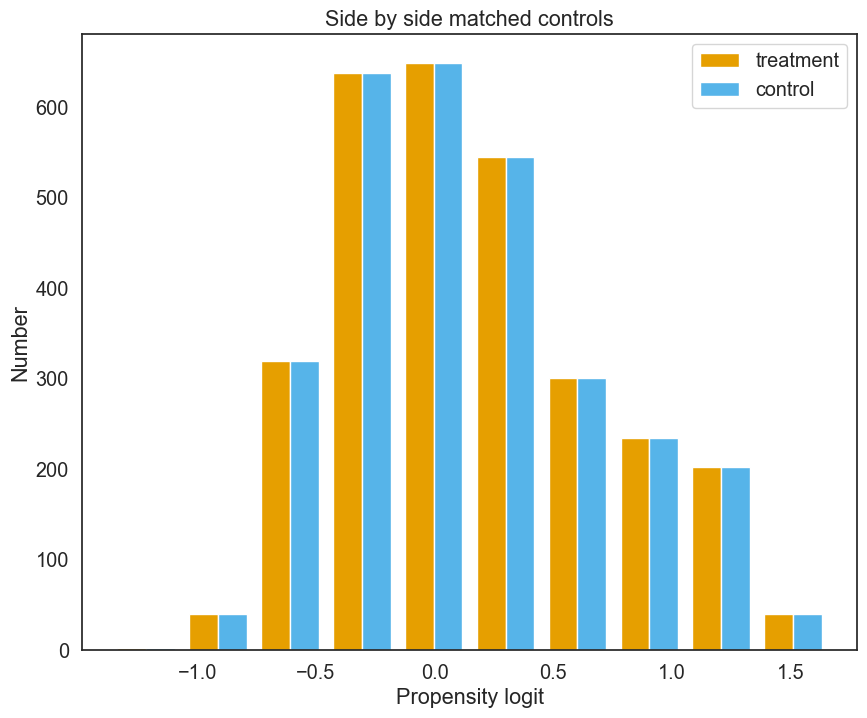

In [61]:
# Result
psm.plot_match(Title='Side by side matched controls', Ylabel='Number', Xlabel= 'Propensity logit', names = ['treatment', 'control'], colors=['#E69F00', '#56B4E9'] ,save=True)

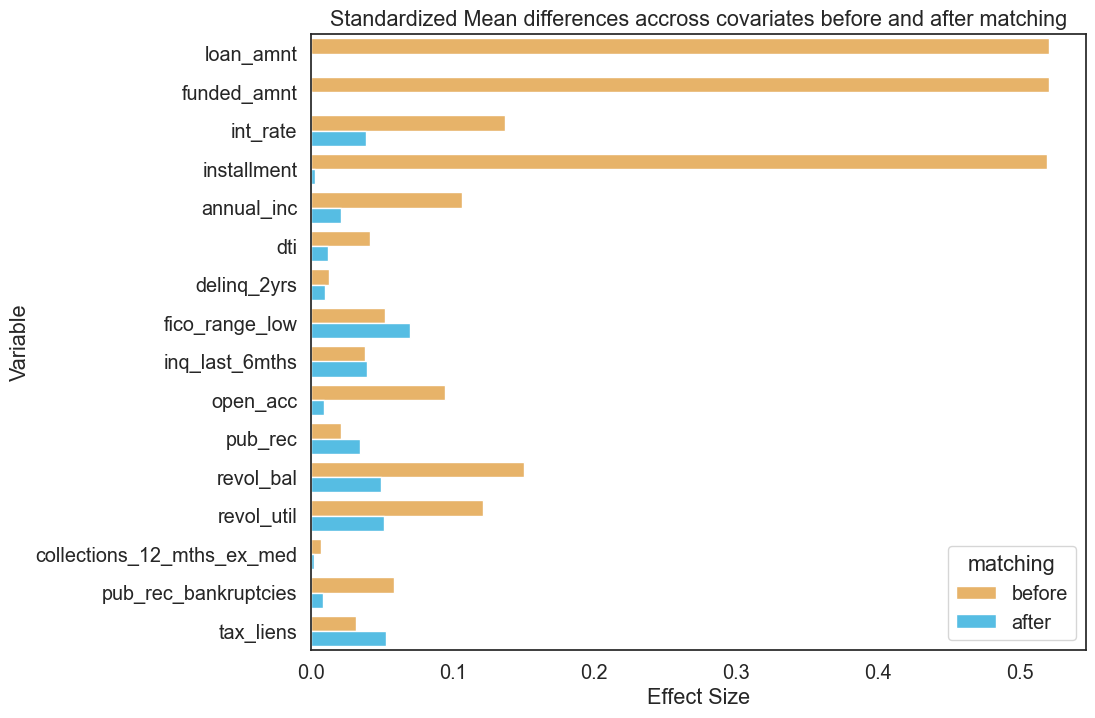

In [62]:
psm.effect_size_plot(title='Standardized Mean differences accross covariates before and after matching', before_color='#FCB754', after_color='#3EC8FB', save=False)

In [63]:
# 매칭 결과 저장
psm_data = psm.df_matched
psm_data.to_csv('propensity score.csv')

In [64]:
psm_data_join = pd.merge(psm_data, sampled_df_test[['index', 'depvar']], on = 'index')

In [65]:
print(df_test[df_test['funded_delta_bi'] == 0]['depvar'].mean()) # 전체 데이터셋에서 투자자가 선호한 상품의 부도율
print(df_test[df_test['funded_delta_bi'] == 1]['depvar'].mean()) # 전체 데이터셋에서 투자자가 비선호한 상품의 부도율
print(sampled_df_test['depvar'].mean()) # 샘플링 데이터의 전체 부도율
print(psm_data_join['depvar'].mean()) # psm에 의해 선택된 전체 부도율
print(psm_data_join[psm_data_join['funded_delta_bi'] == 0]['depvar'].mean()) # PSM 데이터셋에서 투자자가 선호한 상품의 부도율
print(psm_data_join[psm_data_join['funded_delta_bi'] == 1]['depvar'].mean()) # PSM 데이터셋에서 투자자가 비선호한 상품의 부도율

0.16089812
0.17717314
0.16543142
0.17772911
0.18092991
0.1745283


In [ ]:
## issue_d : issue_d는 1-118까지 존재
df_var['tat_issue_d'] = np.nansum(df_var.iloc[:, 126:244], axis=1)
print(all(df_var['tat_issue_d']==1))